# Heart Disease Detection
## Heart Disease Dataset Description

The Heart Disease Dataset contains a number of variables that can be used to predict the presence of heart disease in patients. Each attribute potentially contributes information that could be used to determine heart disease risk.

### Dataset Features:

- **Age**: The patient's age in years.
- **Sex**: The patient's sex (1 = male, 0 = female).
- **Chest Pain Type**: Type of chest pain experienced (values ranging from 1 to 4).
- **Resting Blood Pressure**: Resting blood pressure in mm Hg on admission to the hospital.
- **Serum Cholestrol**: Serum cholesterol in mg/dl.
- **Fasting Blood Sugar**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
- **Resting Electrocardiographic Results**: Resting electrocardiographic results (values 0, 1, 2).
- **Maximum Heart Rate Achieved**: Maximum heart rate achieved during thallium stress test.
- **Exercise Induced Angina**: Exercise-induced angina (1 = yes; 0 = no).
- **ST Depression**: ST depression induced by exercise relative to rest.
- **Slope of the Peak Exercise ST Segment**: The slope of the peak exercise ST segment.
- **Number of Major Vessels**: Number of major vessels colored by fluoroscopy (0-3).
- **Thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect).

### Target Variable:

- **Heart Disease Presence**: The presence of heart disease (0 = no, 1 = yes).




In [ ]:
# Loading the data set
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# Convert the target variable to binary
# 0 indicates no disease, 1 indicates any level of disease
y_binary = np.where(y == 0, 0, 1)
y_binary_series = pd.Series(y_binary.reshape(-1), name='HeartDisease')
# Now, X contains the features and y_binary contains the binary target
print(X.head())
print(y_binary_series.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  
0    0
1    1
2    1
3    0
4    0
Name: HeartDisease, dtype: int64


In [ ]:
# Handling missing values (ex- by removing rows with missing data)
cleaned_X = X.dropna()

# Since 'y' (targets) do not have missing values, they can be used as is
# However, ensure that the rows in 'y' correspond to the rows in the cleaned 'X'
cleaned_indices = cleaned_X.index
cleaned_y = y_binary_series.loc[cleaned_indices]

Data preprocessing (Standardize the features, one-hot encoding, lable encoding)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

#Standardising numerical features
numerical_data = cleaned_X[['age','trestbps','chol','thalach','oldpeak','ca']]
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_data)
numerical_scaled_df = pd.DataFrame(numerical_scaled, columns=numerical_data.columns)

#Binary variables
binary_data_df = cleaned_X[['sex','fbs','exang']]
#Since binary variables are already in 1's and 0's, we do not need to one-hot encode them again
#One-hot encoding these again would only add to dimensionality without giving a feature that provides more information

#Categorical variables
categorical_data = cleaned_X[['cp','restecg','slope','thal']]
#By definition of original dataset, since there is no ordinality in chest pain, rest ecg, slope or thalassemia type, we use one hot encoding
encoder = OneHotEncoder(sparse_output=False)
categorical_encoded = encoder.fit_transform(categorical_data)

categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_data.columns))

#Joining the data
numerical_scaled_df.reset_index(drop=True, inplace=True)
binary_data_df.reset_index(drop=True, inplace=True)
categorical_encoded_df.reset_index(drop=True, inplace=True)

combined_df = pd.concat([numerical_scaled_df, binary_data_df, categorical_encoded_df], axis=1)
combined_df.head(10)


,age,trestbps,chol,thalach,oldpeak,ca,sex,fbs,exang,cp_1,...,cp_4,restecg_0,restecg_1,restecg_2,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
0,0.936181,0.750380,-0.276443,0.017494,1.068965,-0.721976,1,1,0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.378929,1.596266,0.744555,-1.816334,0.381773,2.478425,1,0,1,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,1.411625,1,0,1,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,-0.721976,1,0,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,-0.721976,0,0,0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5,0.161372,-0.659431,-0.218651,1.240047,-0.219520,-0.721976,1,0,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,0.825494,0.468418,0.397801,0.454120,2.185652,1.411625,0,0,0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
7,0.272059,-0.659431,2.054515,0.585108,-0.391318,-0.721976,0,0,1,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,0.936181,-0.095506,0.128103,-0.113493,0.295874,0.344824,1,0,0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
9,-0.170689,0.468418,-0.854367,0.235807,1.756157,-0.721976,1,1,1,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


Splitting training data into training and validation set (the code has been provided)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(combined_df, cleaned_y, test_size = 0.3, random_state=20)

### Decision Tree
From sklearn.tree we first use DecisionTreeClassifier to build a classification model with default parameters.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
### Fit the classifier on the training data

clf = DecisionTreeClassifier(random_state=30)
clf.fit(X_train,y_train)


DecisionTreeClassifier(random_state=30)

In [ ]:
### Make predictions on the training data

y_train_pred = clf.predict(X_train)


Print accuracy, precision and recall for the predictions made on the training data.

In [ ]:
# Print accuracy, precision and recall for the predictions made on the training data.
print(f'Precision: {my_precision(y_train.to_numpy(), y_train_pred)}')
print(f'Recall: {my_recall(y_train.to_numpy(), y_train_pred)}')
print(f'Accuracy: {my_accuracy(y_train.to_numpy(), y_train_pred)}')

Precision: 1.0
Recall: 1.0
Accuracy: 1.0


In [ ]:
### Make predictions on the validation data


y_val_pred = clf.predict(X_val)
y_val_scores = clf.predict_proba(X_val)[:,1]

Print accuracy, prediction and recall for the predictions made on the validation data.

In [ ]:

print(f'Precision: {my_precision(y_val.to_numpy(), y_val_pred)}')
print(f'Recall: {my_recall(y_val.to_numpy(), y_val_pred)}')
print(f'Accuracy: {my_accuracy(y_val.to_numpy(), y_val_pred)}')


Precision: 0.6428571428571429
Recall: 0.7105263157894737
Accuracy: 0.7111111111111111


Plot ROC curve and obtain AUC for predictions on the validation data.

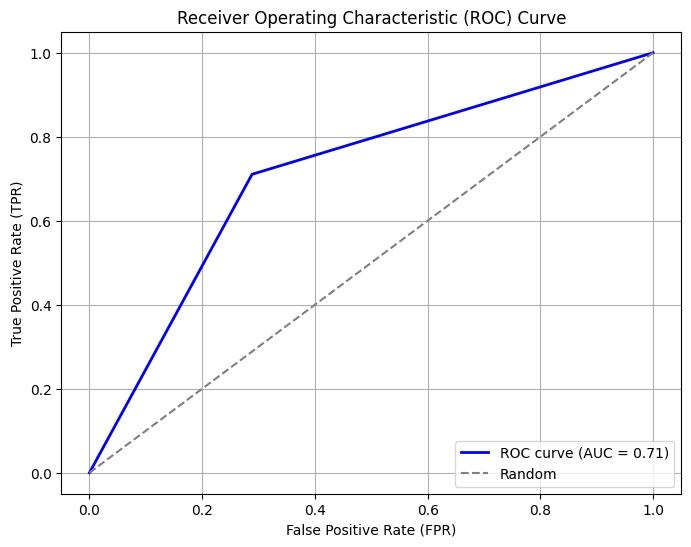

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.


from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

fpr, tpr, threshold = roc_curve(y_val, y_val_scores)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Insight: The high precision, recall and accuracy in the training set suggests that the model fits the training data too closely. This might represent overfitting and make the model prone to noise and perform worse in unseen data. This is in-turn confirmed by the low precision, recall and accuracy set in the validation set.
The model has a low bias (given by the scores with the training set) and high variance (given by the low scores with validation set). This further confirms that the model is overly complex and overfits the data.

### Random Forest approach


Decision Trees have low predictive power compared to other methods due to high variance. Random Forest increases prediction power at the expense of decreased interpretability.


For the next iteration, we use RandomForestClassifier from the sklearn.ensemble to build a classification model with default parameters.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
### Fit the classifier on the training data

classifier = RandomForestClassifier(random_state=30)
classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=30)

In [ ]:
### Make predictions on the training data


y_train_pred = classifier.predict(X_train)


Accuracy, precision and recall for the predictions made on the training data.

In [ ]:
print(f'Training Accuracy = {my_accuracy(y_train.values,y_train_pred)}\n')
print(f'Training Precision = {my_precision(y_train.values,y_train_pred)}\n')
print(f'Training Recall = {my_recall(y_train.values,y_train_pred)}\n')

Training Accuracy = 1.0

Training Precision = 1.0

Training Recall = 1.0



In [ ]:
### Make predictions on the validation data


y_val_pred = classifier.predict(X_val)
y_val_scores = [i[1] for i in classifier.predict_proba(X_val)]

Accuracy, prediction and recall for the predictions made on the validation data.

In [ ]:

print(f'Validation Accuracy = {my_accuracy(y_val.values,y_val_pred)}\n')
print(f'Validation Precision = {my_precision(y_val.values,y_val_pred)}\n')
print(f'Validation Recall = {my_recall(y_val.values,y_val_pred)}\n')

Validation Accuracy = 0.8444444444444444

Validation Precision = 0.8157894736842105

Validation Recall = 0.8157894736842105



Plotting ROC curve and obtain AUC for the validation predictions

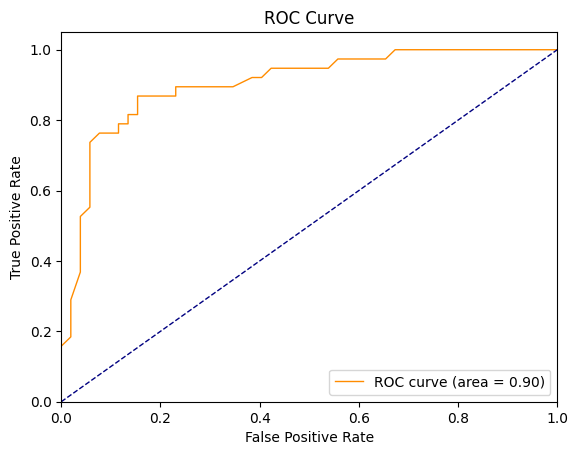

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.


from sklearn.metrics import roc_curve,auc
import sklearn.metrics as metrics



import matplotlib.pyplot as plt
fpr, tpr,_ = roc_curve(y_val,y_val_scores)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 1
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

Insight: Based on the performance scores, the model is still overfitting the training data. It has lower variance (compared to previous model) and low bias. However, it is better than the decision tree model (as suggested by better ROC results). This is because the random forest algorithm takes an average of multiple decision trees via a bootstrap aggregation approach that reduces the variance. It will perform better on unseen generalised data than the previous decision tree model.

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model.

There are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

A quick and efficient way to optimize hyperparameters is to perform Grid Search over different values of the parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# In the below dictionary, fill in the list of values that you want to try out for each parameter
# Refer to the descriptions in sklearn.ensemble.RandomForestClassifier's doc to understand what the parameters depict

param_grid = {
    'max_depth': [5, 10, 20, 30, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4, 8],
    'min_samples_split': [2, 5, 10,20],
    'n_estimators': [50, 100, 200, 300]
}

In [ ]:
print(param_grid)

{'max_depth': [10, 20, 30, None], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [50, 100, 200, 300]}


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(combined_df, cleaned_y, test_size = 0.3, random_state=20)

In [ ]:
rf = RandomForestClassifier(random_state=30)

In [ ]:
grid_search = GridSearchCV(estimator = rf, scoring='recall', param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
### Fit on the training data with all sets of parameters.

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=30), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='recall', verbose=2)

Displaying the parameters of the best model.

In [ ]:
# Print the best parameters

grid_search.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
# Print the best score
grid_search.best_score_

0.8181818181818182

In [ ]:
### Using the best model, making predictions on the training set and display accuracy, precision and recall.

from sklearn.metrics import accuracy_score, precision_score, recall_score
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)

print(f'Training Accuracy = {accuracy_score(y_train, y_train_pred)}\n')
print(f'Training Precision = {precision_score(y_train, y_train_pred)}\n')
print(f'Training Recall = {recall_score(y_train, y_train_pred)}\n')

### Making predictions on the validation set and display accuracy, precision and recall.

y_val_pred = best_model.predict(X_val)

print(f'Validation Accuracy = {accuracy_score(y_val, y_val_pred)}\n')
print(f'Validation Precision = {precision_score(y_val, y_val_pred)}\n')
print(f'Validation Recall = {recall_score(y_val, y_val_pred)}\n')

Training Accuracy = 1.0

Training Precision = 1.0

Training Recall = 1.0

Validation Accuracy = 0.8444444444444444

Validation Precision = 0.8

Validation Recall = 0.8421052631578947



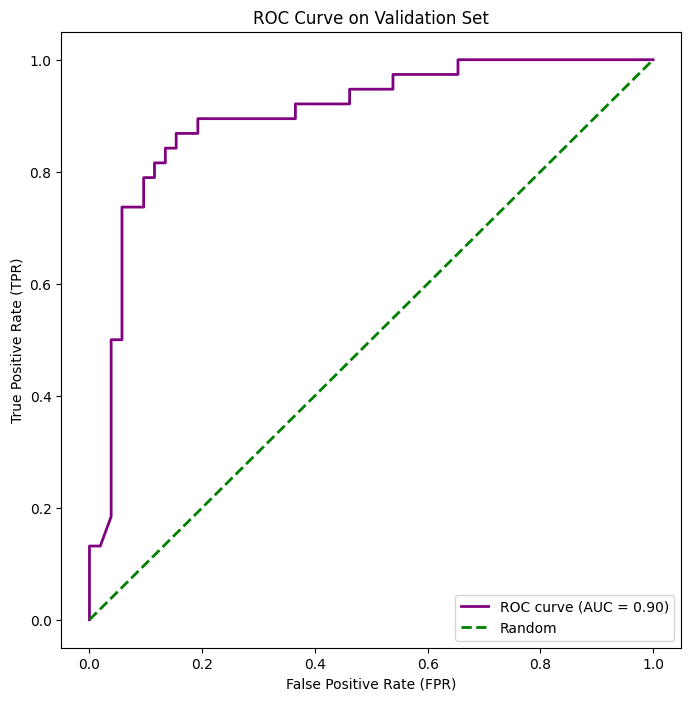

In [ ]:
# Plotting the ROC curve on validation set by giving appropriate names for title and axes.


from sklearn.metrics import roc_curve,auc
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

y_val_prob = best_model.predict_proba(X_val)[:, 1]
fpr, tpr,_ = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr,tpr)

plt.figure(figsize = (8, 8))
plt.plot(fpr, tpr, color = 'purple', lw = 2, label = 'ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color = 'green', lw = 2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve on Validation Set')
plt.legend(loc='lower right')
plt.show()